In [1]:
#Load Data
import gensim
from gensim.models import CoherenceModel
import pandas as pd
import pickle
with open('data_clean_token.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

figures = "/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/"

### Comparing different filtering levels of copora and dictionaries

In [2]:
def create_corpora_dict(texts, num_corpora = 2, no_below_start=1, 
                        no_below_step = 1, keep_n = None,
                        no_above_start = 0.9, no_above_step = 0.1):

    from gensim.corpora import Dictionary
        #Filtered Dictionary

    dict_list = []
    corpora_list = []


    for corps in range(num_corpora):
        dictionary = Dictionary(documents=texts, prune_at=None)
        dictionary.filter_extremes(no_below=no_below_start, no_above= no_above_start)
        dictionary.compactify()
        corpus = [dictionary.doc2bow(doc) for doc in texts] 
        
        dict_list.append(dictionary)
        corpora_list.append(corpus)
        no_below_start+= no_below_step
        no_above_start-= no_above_step
        print("Corpus "+str(corps)+ " has " +str(len(dictionary))+" token.")

    return dict_list, corpora_list

In [3]:
dict_list, corpora = create_corpora_dict(texts=dataset, num_corpora=10, no_above_step=0.05)

Corpus 0 has 27812 token.
Corpus 1 has 15765 token.
Corpus 2 has 11559 token.
Corpus 3 has 9346 token.
Corpus 4 has 7979 token.
Corpus 5 has 7035 token.
Corpus 6 has 6298 token.
Corpus 7 has 5720 token.
Corpus 8 has 5282 token.
Corpus 9 has 4903 token.


In [18]:
def compare_dicts(dict_list, corpus_list, texts):

    passes= 30
    iterations = 50
    eval_every=0
    workers = 7
    num_topics = 8
    
    assert(len(dict_list) == len(corpus_list)), "Dictionary and the corpus list should have the same length."
   
    model_list = []
    for index in range(len(dict_list)):
        model = gensim.models.LdaMulticore(corpus=corpus_list[index], num_topics=num_topics, 
                                           id2word=dict_list[index], workers=workers, passes=passes, 
                                           iterations=iterations, eval_every=eval_every)
        model_list.append(model)
        
    return model_list

In [6]:
# method for getting coherence scores both for models and topics
def coherence_scores(model_list, corpus_list, dict_list, texts, coherence='c_v'):
    
    coherences_model = []
    coherences_per_topic = []
    for i in range(len(model_list)):
        coh_model = CoherenceModel(model=model_list[i], texts=texts, coherence=coherence, corpus=corpus_list[i])
        coherences_model.append(coh_model.get_coherence())
        coherences_per_topic.append(coh_model.get_coherence_per_topic())
    
    return coherences_model, coherences_per_topic
    

In [8]:
#Differently cleaned dictionaries and corpora compared with c_v and umass
models = compare_dicts(corpus_list=corpora, dict_list=dict_list, 
                       texts=dataset)

In [19]:
models2 = compare_dicts(corpus_list=corpora, dict_list=dict_list, 
                       texts=dataset)

In [9]:
cv_score_models, cv_score_per_topic = coherence_scores(model_list=models, corpus_list=corpora, 
                                                       dict_list=dict_list, texts=dataset, 
                                                       coherence='c_v')

umass_score_models, umass_score_per_topic = coherence_scores(model_list=models, corpus_list=corpora, 
                                                             dict_list=dict_list, texts=dataset, 
                                                             coherence = 'u_mass')

In [10]:
cuci_score_models, cuci_score_per_topic = coherence_scores(model_list=models, corpus_list=corpora, 
                                                             dict_list=dict_list, texts=dataset, 
                                                             coherence = 'c_uci')

cnpmi_score_models, cnpmi_score_per_topic = coherence_scores(model_list=models, corpus_list=corpora, 
                                                             dict_list=dict_list, texts=dataset, 
                                                             coherence = 'c_npmi')

In [22]:
cv_score_models2, cv_score_per_topic2 = coherence_scores(model_list=models2, corpus_list=corpora, 
                                                       dict_list=dict_list, texts=dataset, 
                                                       coherence='c_v')

umass_score_models2, umass_score_per_topic2 = coherence_scores(model_list=models2, corpus_list=corpora, 
                                                             dict_list=dict_list, texts=dataset, 
                                                             coherence = 'u_mass')

cuci_score_models2, cuci_score_per_topic2 = coherence_scores(model_list=models2, corpus_list=corpora, 
                                                             dict_list=dict_list, texts=dataset, 
                                                             coherence = 'c_uci')

cnpmi_score_models2, cnpmi_score_per_topic2 = coherence_scores(model_list=models2, corpus_list=corpora, 
                                                             dict_list=dict_list, texts=dataset, 
                                                             coherence = 'c_npmi')

### Compare models with different topic numbers

In [11]:
def compare_topic_numbers(dictionary, corpus, texts, limit=16, start=2, step=1):

    passes=20
    iterations = 200
    eval_every=1
    per_word_topics = False
    workers = 3
    
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, 
                                           workers=workers, passes=passes, iterations=iterations, 
                                           eval_every=eval_every)
        model_list.append(model)

    return model_list

### Making pgf for LaTeX work

In [12]:
#Setting the PATH variable right for LaTeX 
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-linux/'


In [13]:
#using the pdf module so pyplot figures can be displayed in LaTeX

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import six

import matplotlib as mpl
mpl.use("pgf", warn=False)
pgf_with_custom_preamble = {
    "font.family": "serif", # use serif/main font for text elements
    "pgf.texsystem": "xelatex",
    "text.usetex": True,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",         # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",  # unicode math setup
         #r"\setmathfont{xits-math.otf}",
         #r"\setmainfont{DejaVu Serif}", # serif font via preamble
         ]
}
mpl.rcParams.update(pgf_with_custom_preamble)


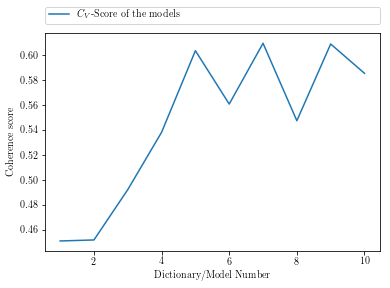

In [35]:
# 
%matplotlib inline
import matplotlib.pyplot as plt
limit=11; start=1; step=1;
x = range(start, limit, step)
#plt.plot(x, cv_score_models, label="$C_V$-Score of the models")
plt.plot(x, cv_score_models, label="$C_{V}$-Score of the models")
#plt.plot(x, cv_score_models2, label="$C_{V}$-Scores on model2")
plt.xlabel("Dictionary/Model Number")
plt.ylabel("Coherence score")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='best',
           ncol=2, mode="expand", borderaxespad=0.)

plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_cv.pgf')
#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_umass.pgf')

plt.show()

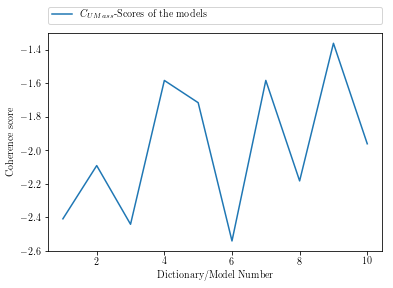

In [36]:
# 
%matplotlib inline
import matplotlib.pyplot as plt
limit=11; start=1; step=1;
x = range(start, limit, step)
#plt.plot(x, cv_score_models, label="$C_V$-Score of the models")
#plt.plot(x, cuci_score_models, label="$C_{UCI}$-Score")
plt.plot(x, umass_score_models, label="$C_{UMass}$-Scores of the models")
#plt.plot(x, umass_score_models2, label="$C_{UMass}$-Scores on Model2")

#plt.plot(x, cnpmi_score_models, label="$C_{NPMI}$-Score")
plt.xlabel("Dictionary/Model Number")
plt.ylabel("Coherence score")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='best',
           ncol=2, mode="expand", borderaxespad=0.)

#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_cv.pgf')
#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_umass.pgf')

plt.show()

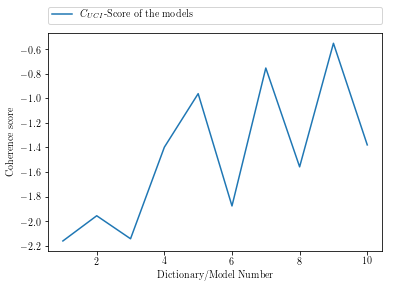

In [16]:
# 
%matplotlib inline
import matplotlib.pyplot as plt
limit=11; start=1; step=1;
x = range(start, limit, step)
#plt.plot(x, cv_score_models, label="$C_V$-Score of the models")
plt.plot(x, cuci_score_models, label="$C_{UCI}$-Score of the models")
plt.xlabel("Dictionary/Model Number")
plt.ylabel("Coherence score")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='best',
           ncol=2, mode="expand", borderaxespad=0.)

#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_cv.pgf')
#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_umass.pgf')

plt.show()

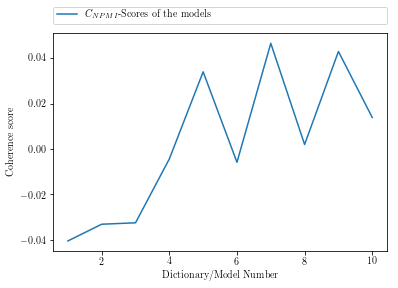

In [40]:
# 
%matplotlib inline
import matplotlib.pyplot as plt
limit=11; start=1; step=1;
x = range(start, limit, step)
#plt.plot(x, cv_score_models, label="$C_V$-Score of the models")
plt.plot(x, cnpmi_score_models, label="$C_{NPMI}$-Scores of the models")
#plt.plot(x, cnpmi_score_models2, label="$C_{NPMI}$-Scores on Model2")

plt.xlabel("Dictionary/Model Number")
plt.ylabel("Coherence score")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='best',
           ncol=2, mode="expand", borderaxespad=0.)

#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_cv.pgf')
#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_umass.pgf')
plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/dict_models_npmi.pgf')

plt.show()

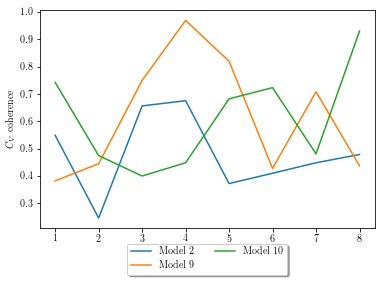

In [90]:
# Show graph with the scores
%matplotlib inline
import matplotlib.pyplot as plt
limit=9; start=1; step=1;
x = range(start, limit, step)
#plt.figure(figsize=(3,2))
#plt.plot(x, cv1_topic_scores, label= "without extremes")
#plt.plot(x, cv2_topic_scores, label= "with extremes")
#plt.plot(x, cv_score_per_topic[0], label= "Model 1")
plt.plot(x, cv_score_per_topic[1], label= "Model 2")
#plt.plot(x, umass_score_per_topic[1], label= "Model 2")

#plt.plot(x, cv_score_per_topic[2], label= "Model 3")
#plt.plot(x, cv_score_per_topic[3], label= "Model 4")
#plt.plot(x, cv_score_per_topic[4], label= "Model 5")
#plt.plot(x, cv_score_per_topic[5], label= "Model 6")
#plt.plot(x, cv_score_per_topic[6], label= "Model 7")
#plt.plot(x, cv_score_per_topic[7], label= "Model 8")
#plt.plot(x, umass_score_per_topic[8], label= "Model 9")
#plt.plot(x, umass_score_per_topic[9], label= "Model 10")
plt.plot(x, cv_score_per_topic[8], label= "Model 9")
plt.plot(x, cv_score_per_topic[9], label= "Model 10")

plt.xlabel("Topic id")
plt.ylabel("$C_{V}$ coherence")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

#plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/test3.pgf')
plt.show()

In [23]:
#Umass
limit=9; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(5, 3))
plt.plot(x, umass1_topic_scores, umass2_topic_scores)

plt.xlabel("Topic number")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('/home/noxius/MEGA/MasterThesis/LaTeX/dokument-recognition-classification/Figures/example1.pgf')

NameError: name 'plt' is not defined

In [27]:
def topics_to_columns(lda_model, num_words = 5, column_as_topic = True, to_csv = False, path=None):
    topics = lda_model.show_topics(num_words=num_words, formatted=False)
    tops = {}
    new = []
    topic = []
    columns=[]
    for t in range(0,lda_model.num_topics):
        for w in range(len(topics[1][1])):
            topic.append(topics[t][1][w][0])
        tops[t] = topic
        topic = []

    columns=['term'+str(t) for t in range(len(topics[1][1]))]    
    index= ['topic'+str(t) for t in range(lda_model.num_topics)]  

    
    import pandas as pd
    data = pd.DataFrame.from_dict(data=tops, orient='index', columns=columns)
    data.index = index
    if column_as_topic == True:
        data = data.transpose()
        data.columns = ['topic'+str(t) for t in range(lda_model.num_topics)]
    if to_csv == True and path != None:
        if column_as_topic == False:
            data.to_csv(index_label="topic_id", path_or_buf=path+".csv")
        else:
            data.to_csv(index_label="words", path_or_buf=path+".csv")
    return data
    
   

In [28]:
topics_to_columns(models[8], num_words=10, to_csv=False, path=figures+'test.csv')

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7
term0,versichern,name,vodafone,verarbeitung,sparkasse,coupon,postfach,mieter
term1,versicherung,konto,netz,gemäß,kontoauszug,online,nutzer,arbeitgeber
term2,leistungen,stellen,kunden,personenbezogenen,einwendungen,karte,anteil,verpflichten
term3,gelten,zahlung,internet,verarbeiten,kontostand,nutzen,techem,vermieter
term4,versicherungsschutz,inkasso,spanien,erforderlich,schecks,original,rechnung,arbeitnehmer
term5,vertrag,forderung,kunde,datenschutz,lastschriften,einkauf,betriebskosten,schriftlich
term6,beitrag,angaben,deutschland,verantwortlich,buchungen,gelten,gesamtkosten,folgend
term7,beiträge,firma,rechnung,stellen,entnehmen,punkte,summe,seiten
term8,zahlen,kontoinhaber,vertrag,betroffen,zinsen,service,samen,unterschrift
term9,absatz,sitzen,spätestens,speichern,geschäftsbedingungen,digital,verwaltung,anlage


### PyLDAvis

In [44]:
%time

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


pyLDAvis.enable_notebook()

vis1 = pyLDAvis.gensim.prepare(lda_no_extremes, d2b_dataset2, dictionary2)
vis2 = pyLDAvis.gensim.prepare(lda_extremes, d2b_dataset2, dictionary2)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.63 µs


/home/noxius/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=d2b_dataset,
                                                        texts=data, start=2, 
                                                        limit=16, step=1)

In [111]:
%%time
import pyLDAvis 
import multiprocessing 
from gensim.models import LdaMulticore

num_topics = 8
passes = 6
batch = True
alpha = 'symmetric' 
eta = None # 'auto' 
eval_every = None


lda_no_extremes = LdaMulticore(
    corpus=d2b_dataset, num_topics=num_topics, id2word=dictionary,
    workers=None, eval_every=None, passes=10, batch=True
)


lda_extremes = LdaMulticore(
    corpus=d2b_dataset2, num_topics=num_topics, id2word=dictionary2,
    workers=None, eval_every=None, passes=10, batch=True
)


"""
lda_symmetric = LdaMulticore(
    corpus=d2b_dataset2, num_topics=num_topics, id2word=dictionary2,
    workers=None, eval_every=None, passes=10, batch=True, alpha='symmetric'
)
lda_asymmetric = LdaMulticore(
    corpus=d2b_dataset2, num_topics=num_topics, id2word=dictionary2,
    workers=None, eval_every=None, passes=10, batch=True, alpha='asymmetric'
)
"""

#Coherence model
cv1 = CoherenceModel(texts = dataset, model=lda_no_extremes, corpus=d2b_dataset, dictionary=dictionary, coherence='c_v')
cv2 = CoherenceModel(texts = dataset, model=lda_extremes, corpus=d2b_dataset2, dictionary=dictionary2, coherence='c_v')
umass1 = CoherenceModel(model=lda_no_extremes, corpus=d2b_dataset, dictionary=dictionary, coherence='u_mass')
umass2 = CoherenceModel(model=lda_extremes, corpus=d2b_dataset2, dictionary=dictionary2, coherence='u_mass')

#Scores by models
cv1_model_score = cv1.get_coherence()
cv2_model_score = cv2.get_coherence()
umass1_model_scores = umass1.get_coherence()
umass2_model_scores = umass2.get_coherence()

#Scores by topics
cv1_topic_scores = cv1.get_coherence_per_topic()
cv2_topic_scores = cv2.get_coherence_per_topic()
umass1_topic_scores = umass1.get_coherence_per_topic()
umass2_topic_scores = umass2.get_coherence_per_topic()


CPU times: user 33.4 s, sys: 4.64 s, total: 38 s
Wall time: 43.3 s
